In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'src/train.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


# analise basica do conjunto de dados


In [5]:
desc_stats = df.describe(include='all')
print(desc_stats)

             User_ID Product_ID  Gender     Age     Occupation City_Category  \
count   5.500680e+05     550068  550068  550068  550068.000000        550068   
unique           NaN       3631       2       7            NaN             3   
top              NaN  P00265242       M   26-35            NaN             B   
freq             NaN       1880  414259  219587            NaN        231173   
mean    1.003029e+06        NaN     NaN     NaN       8.076707           NaN   
std     1.727592e+03        NaN     NaN     NaN       6.522660           NaN   
min     1.000001e+06        NaN     NaN     NaN       0.000000           NaN   
25%     1.001516e+06        NaN     NaN     NaN       2.000000           NaN   
50%     1.003077e+06        NaN     NaN     NaN       7.000000           NaN   
75%     1.004478e+06        NaN     NaN     NaN      14.000000           NaN   
max     1.006040e+06        NaN     NaN     NaN      20.000000           NaN   

       Stay_In_Current_City_Years  Mari

# verificaçao de valores ausentes

In [6]:
missing_values = df.isnull().sum
print('Valores Ausuntes por Coluna:')
print(missing_values)

Valores Ausuntes por Coluna:
<bound method DataFrame.sum of         User_ID  Product_ID  Gender    Age  Occupation  City_Category  \
0         False       False   False  False       False          False   
1         False       False   False  False       False          False   
2         False       False   False  False       False          False   
3         False       False   False  False       False          False   
4         False       False   False  False       False          False   
...         ...         ...     ...    ...         ...            ...   
550063    False       False   False  False       False          False   
550064    False       False   False  False       False          False   
550065    False       False   False  False       False          False   
550066    False       False   False  False       False          False   
550067    False       False   False  False       False          False   

        Stay_In_Current_City_Years  Marital_Status  Product_Cat

# verificaçõa de valores exclusivos


In [7]:
unique_values = df.nunique()
print('Valores Exclusivos por Coluna:')
print(unique_values)


Valores Exclusivos por Coluna:
User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64


# Distribuição de compras


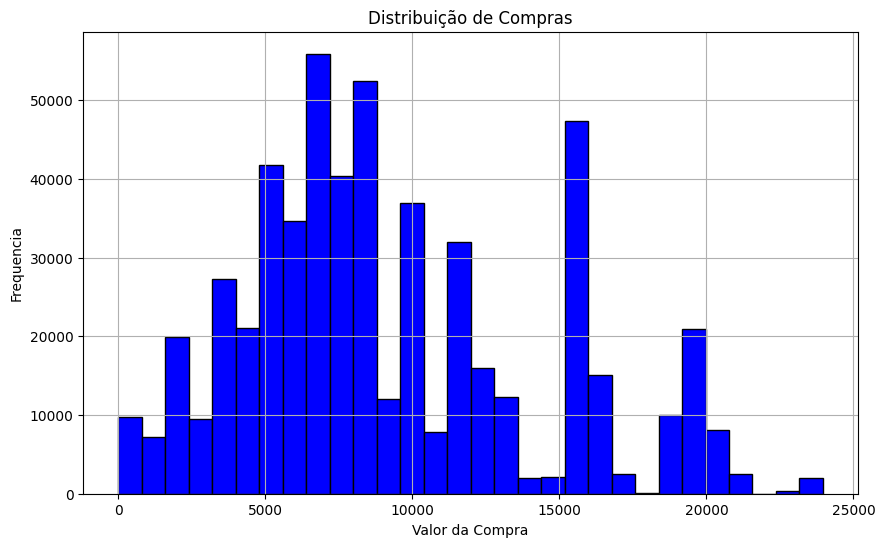

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df['Purchase'], bins=30,color='blue', edgecolor='black')
plt.title('Distribuição de Compras')
plt.xlabel('Valor da Compra')
plt.ylabel('Frequencia')
plt.grid(True)
plt.show()

# Verificação de outliers


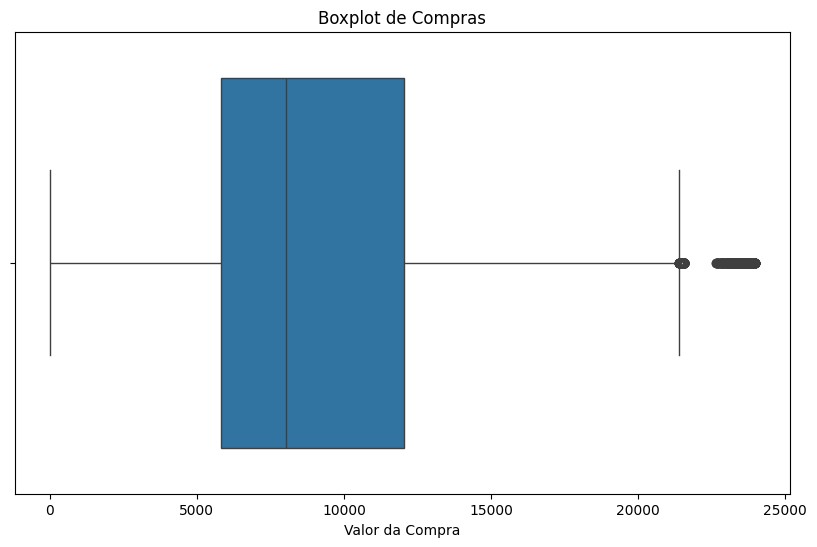

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Purchase'])
plt.title('Boxplot de Compras')
plt.xlabel('Valor da Compra')
plt.show()

In [12]:
mean_purchase = df['Purchase'].mean()
std_purchase = df['Purchase'].std()

Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['Purchase'] < lower_limit) | (df['Purchase'] > upper_limit)]

print("Limite Inferior:", lower_limit)
print("Limite Superior:", upper_limit)
print("Número de Outliers:", len(outliers))

Limite Inferior: -3523.5
Limite Superior: 21400.5
Número de Outliers: 2677


# analise de genero

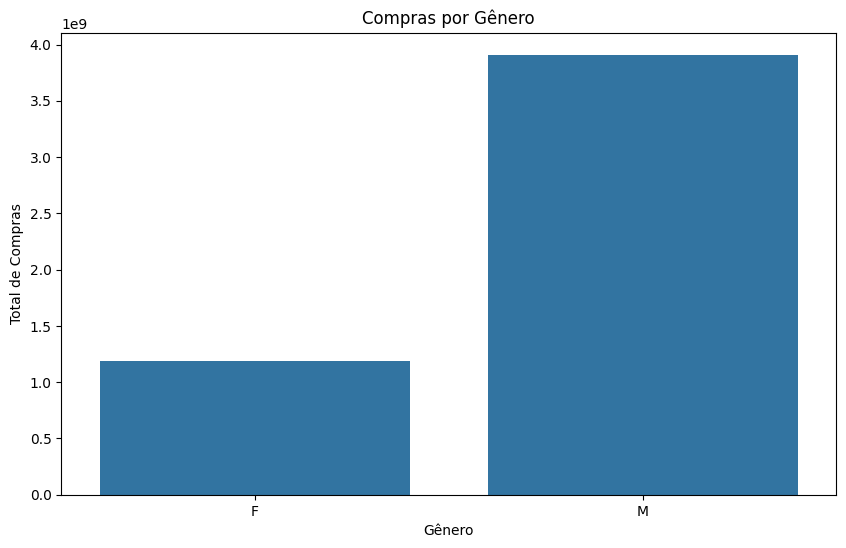

In [13]:
gender_purchase = df.groupby('Gender')['Purchase'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=gender_purchase.index, y=gender_purchase.values)
plt.title('Compras por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Total de Compras')
plt.show()

# analise por estado civil


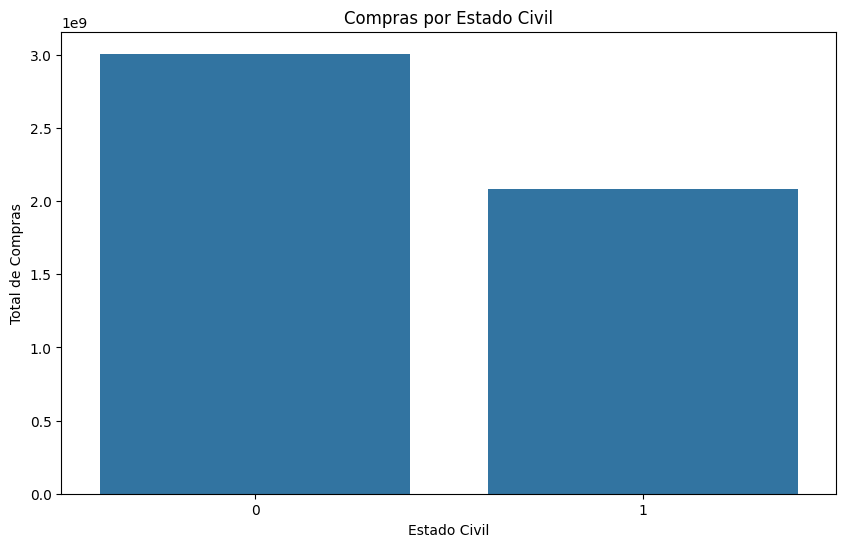

In [14]:
marital_status_purchase = df.groupby('Marital_Status')['Purchase'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=marital_status_purchase.index, y=marital_status_purchase.values)
plt.title('Compras por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Total de Compras')
plt.show()

# analise por estado civil


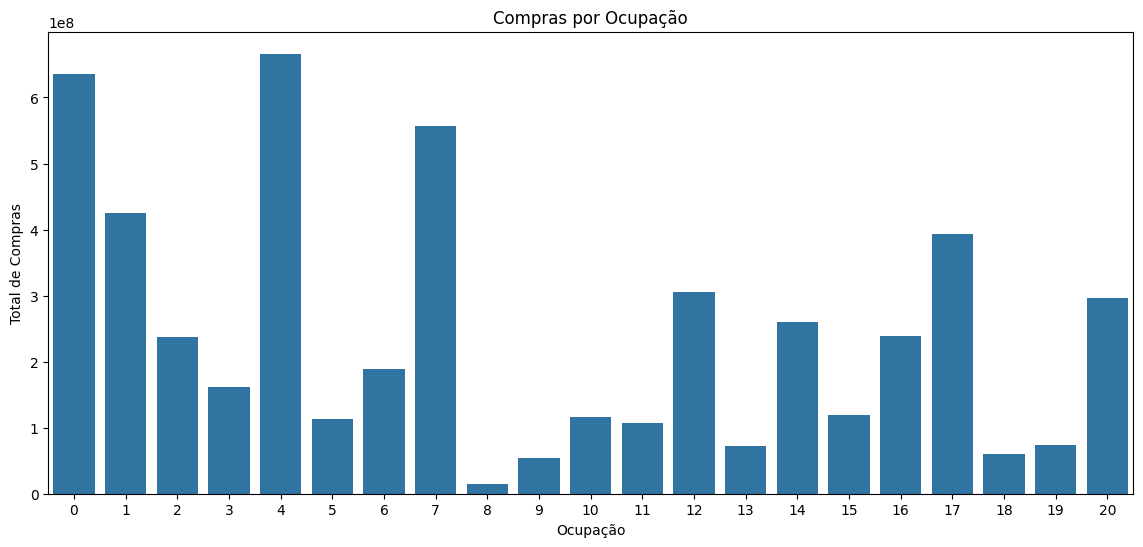

In [15]:
occupation_purchase = df.groupby('Occupation')['Purchase'].sum()

plt.figure(figsize=(14, 6))
sns.barplot(x=occupation_purchase.index, y=occupation_purchase.values)
plt.title('Compras por Ocupação')
plt.xlabel('Ocupação')
plt.ylabel('Total de Compras')
plt.show()

# analise de ocupação vs compra


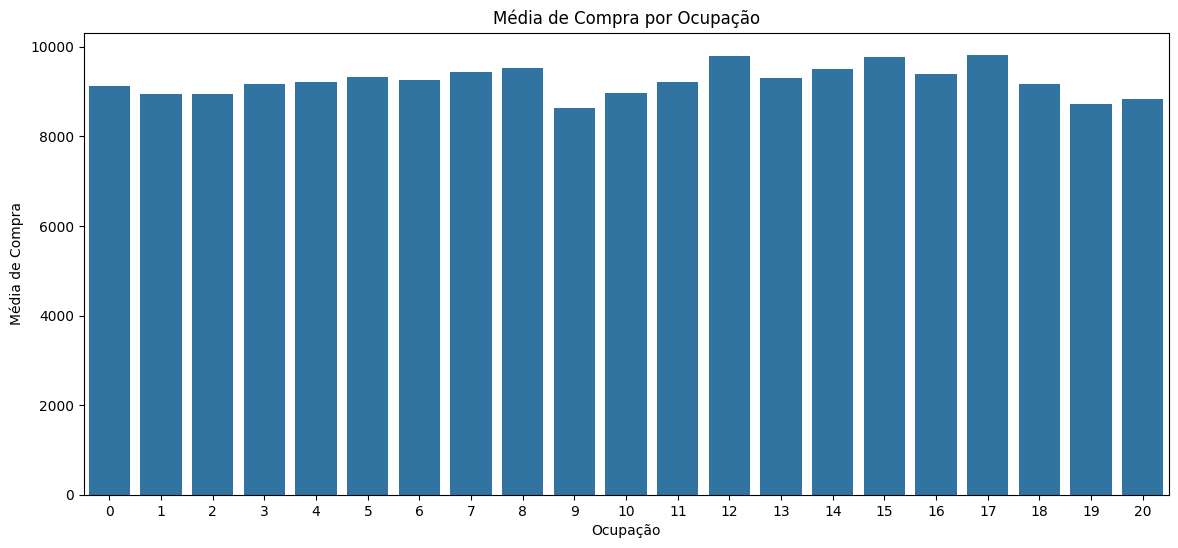

In [16]:
avg_purchase_by_occupation = df.groupby('Occupation')['Purchase'].mean()

plt.figure(figsize=(14, 6))
sns.barplot(x=avg_purchase_by_occupation.index, y=avg_purchase_by_occupation.values)
plt.title('Média de Compra por Ocupação')
plt.xlabel('Ocupação')
plt.ylabel('Média de Compra')
plt.show()

# analise de compra por cidade


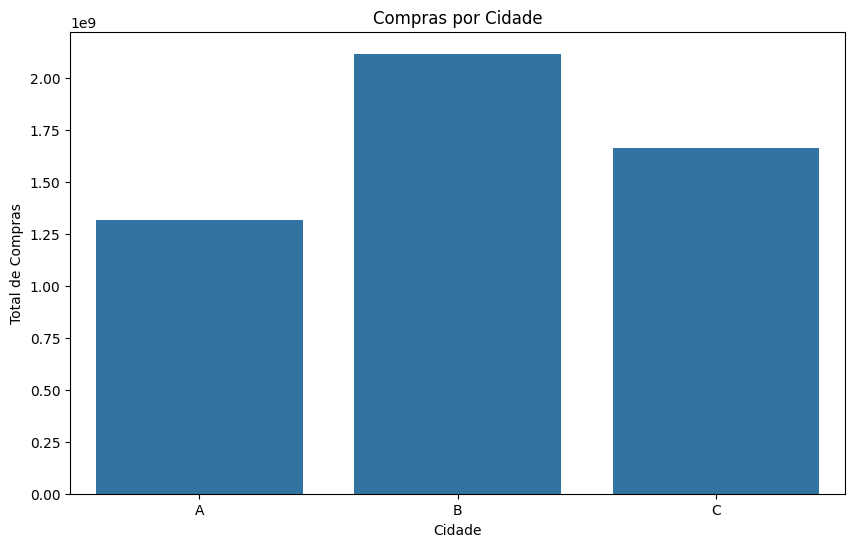

In [17]:
city_purchase = df.groupby('City_Category')['Purchase'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=city_purchase.index, y=city_purchase.values)
plt.title('Compras por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Total de Compras')
plt.show()

# analise de compra por faixa etaria


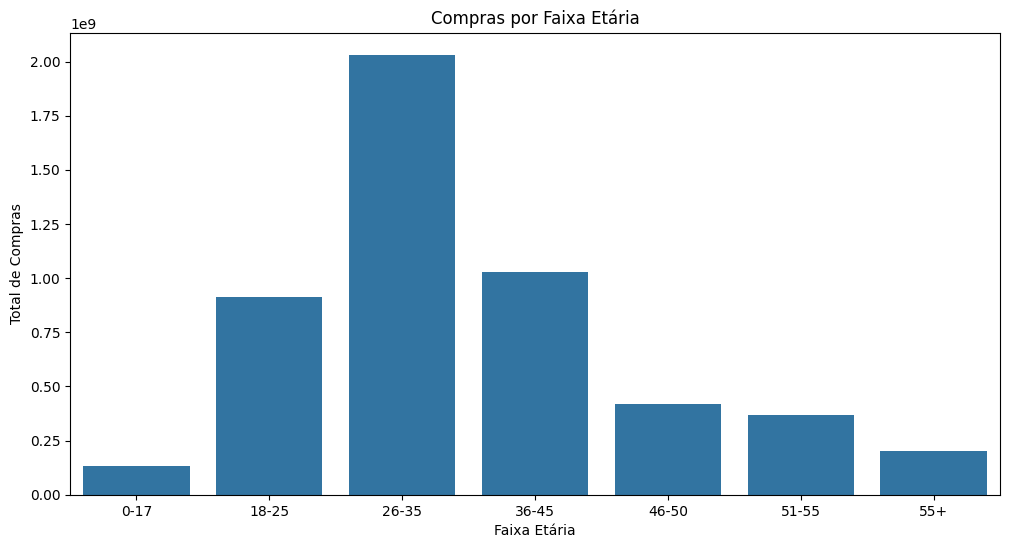

In [18]:
age_purchase = df.groupby('Age')['Purchase'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=age_purchase.index, y=age_purchase.values)
plt.title('Compras por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Total de Compras')
plt.show()
